<a href="https://colab.research.google.com/github/temple17/self-review/blob/main/California_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is for practicing EDA about california hosing price with   
kaggle, EDA book, and hadns-on-maching learning with scikit learn and   
tensorflow.

     
After finishing this practice, I will conduct new EDA pracitce with Korean housing price data   
and also build machine learning model with linear regression.

# Step 1. Import libraries & Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 
import tarfile
import urllib.request

In [3]:
# 다운로드 링크
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# 파일을 다운받을 디렉토리
HOUSING_PATH = os.path.join("datasets", "housing")
# 다운로드 링크에서 구체적인 다운로드 파일명과 확장자
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.info()

# target : median_house_value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4c0d6ea90>,
      dtype=object)

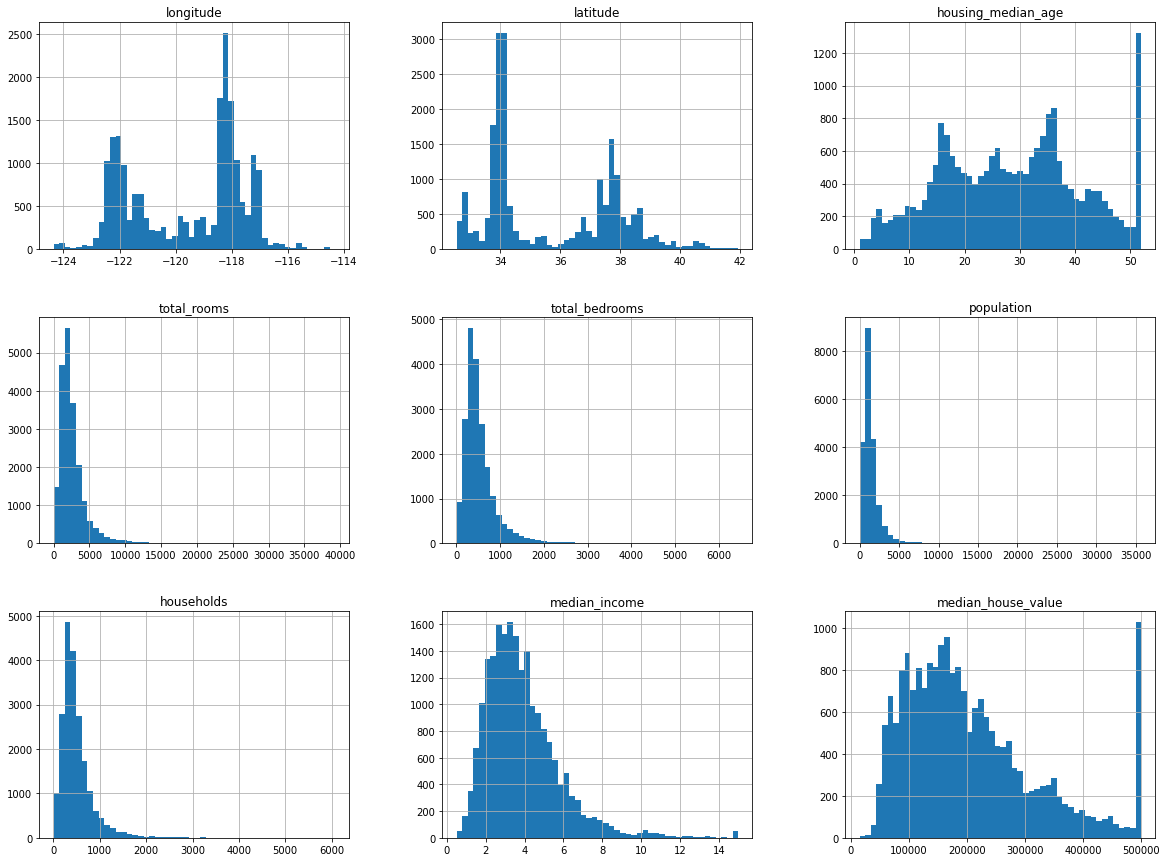

In [12]:
housing.hist(bins = 50, figsize = (20,15))

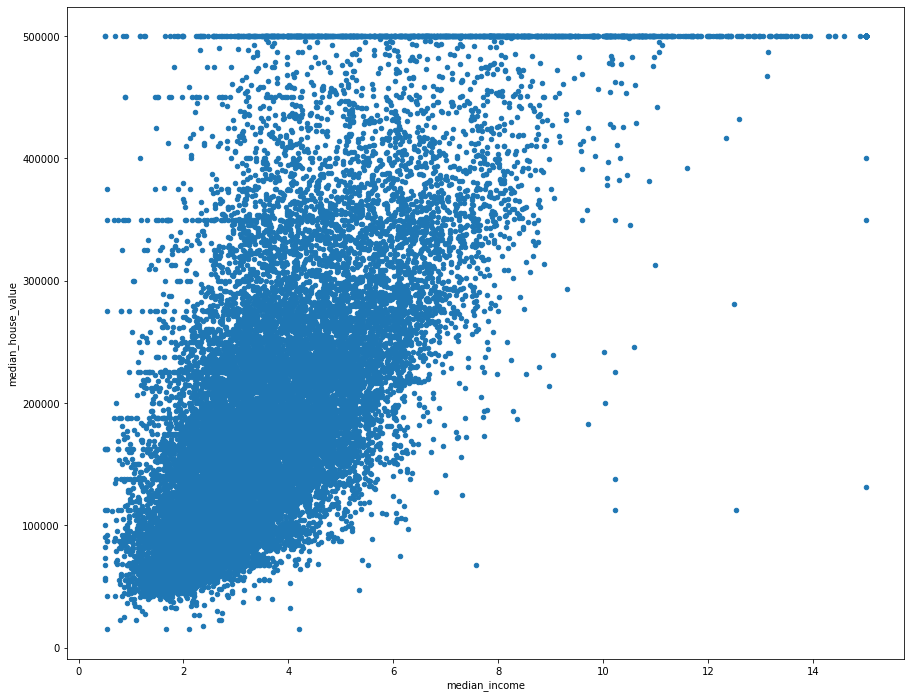

In [13]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', figsize=(15,12))

In [58]:
plt.figure(figsize = (15,12))
px.scatter(housing, x = housing['median_income'], y = housing['median_house_value'], color = housing['ocean_proximity'])

<Figure size 1080x864 with 0 Axes>

In [73]:
housing[housing['median_house_value'] >= 500000].groupby(['ocean_proximity']).count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,geometry
ocean_proximity,,,,,,,,,,
<1H OCEAN,541,541,541,541,541,541,541,541,541,541
INLAND,28,28,28,28,28,28,28,28,28,28
NEAR BAY,202,202,202,202,202,202,202,202,202,202
NEAR OCEAN,221,221,221,221,221,221,221,221,221,221


In [79]:
# 집 가격 100000 당 데이터 수

housing['value_range'] = pd.cut(housing['median_house_value'], 5, labels = ['1', '2', '3', '4','5'])

In [88]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry,value_range
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000),5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000),4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000),4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000),4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000),4


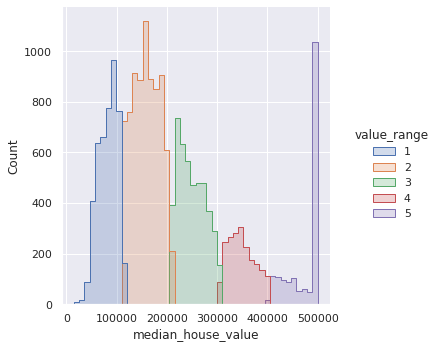

In [89]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.displot(housing, x = 'median_house_value', hue = 'value_range', element = 'step')

In [15]:
housing.groupby(['ocean_proximity']).size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [16]:
# Check the missing data

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <a list of 10 Patch objects>)

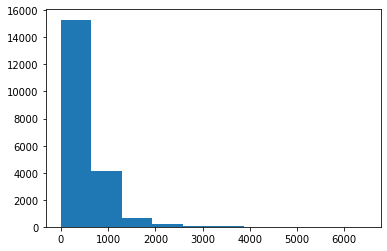

In [17]:
plt.hist(data = housing, x = 'total_bedrooms')

# Own question

- null 값이 없지만 다 정상적인 데이터가 채워져 있는지? 
- 침실의 null 값에 어떤 값을 채워넣을 건지? -> replace with median value
    - 채워 넣고 상관관계가 어떻게 달라질 수 있는지?
- 집 가격에 가장 영향을 많이 주는 칼럼은? ( 상관관계 )
- 집 가격이 높은 집의 특징과 집 가격이 낮은 집의 특징 비교
- 카테고리 변수를 어떻게 바꿀 것인지
- 다양한 시각화를 통한 데이터 탐색(pandas, seaborn, matplotlib) -> O

# Assumptions

- 소득이 높은 가구의 집이 비쌀 것이다.
- 바다와 인접한 집이 비쌀까?
- 경도 위도에 따른 집 가격은 어떨까?

# Modeling

- 모델 개발에 분석한 결과를 고려해서 평가
- Jason ML 참고

# Handle null values (total_bedrooms)

Replacing null values
1. mean value
2. median value
3. mode value
4. constant value

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
print(housing["total_bedrooms"].mean())
print("\n")
print(housing["total_bedrooms"].median())
print("\n")
print(housing["total_bedrooms"].mode())

537.8705525375618


435.0


0    280.0
dtype: float64


In [20]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [21]:
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(housing["total_bedrooms"].median())

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Correlation

In [23]:
housing.corr()["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049457
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Detect Outliers

## 1H<OCEAN
## INLAND

### get IQR values and do log transformation

In [24]:
# <1H OCEAN

housing[housing['ocean_proximity'] == '<1H OCEAN'].describe()['median_house_value']
h1_Q1 = housing[housing['ocean_proximity'] == '<1H OCEAN'].describe()['median_house_value']['25%']
h1_Q3 = housing[housing['ocean_proximity'] == '<1H OCEAN'].describe()['median_house_value']['75%']
IQR = h1_Q3 - h1_Q1
print(IQR)

housing[housing['ocean_proximity'] == '<1H OCEAN'].describe()['median_house_value']

Q3_150 = (h1_Q3 * 1.5)

# over the Q3_150 values => treat as outliers

125000.0


In [25]:
housing[housing['ocean_proximity'] == '<1H OCEAN']['median_house_value'].where(housing['median_house_value'] >= 433650.0).count()

769

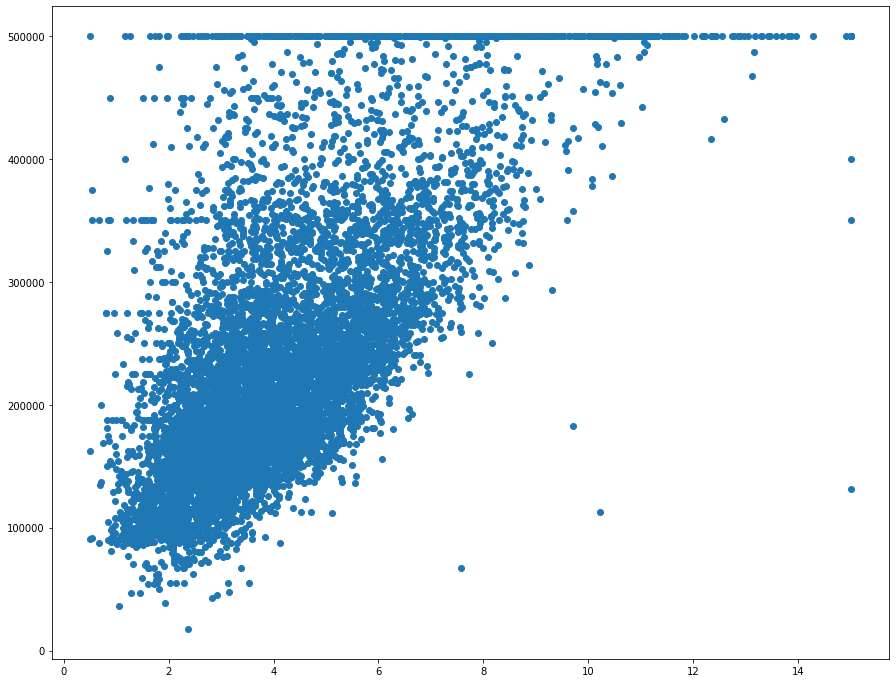

In [49]:
plt.figure(figsize = (15,12))
plt.scatter(x = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_income'], y = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_house_value'])

(array([  24.,  573., 1552., 2252., 1724.,  999.,  708.,  386.,  242.,
         676.]),
 array([ 17500. ,  65750.1, 114000.2, 162250.3, 210500.4, 258750.5,
        307000.6, 355250.7, 403500.8, 451750.9, 500001. ]),
 <a list of 10 Patch objects>)

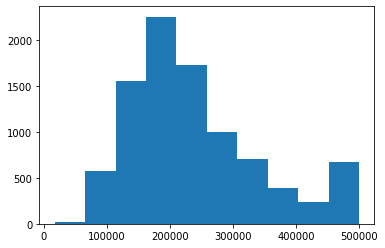

In [50]:
plt.hist(x = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_house_value'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe4ae2b3910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe4ae2b2410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4ae2cd750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4ae2cc090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe4ae2b3150>,
  <matplotlib.lines.Line2D at 0x7fe4ae2b2f50>]}

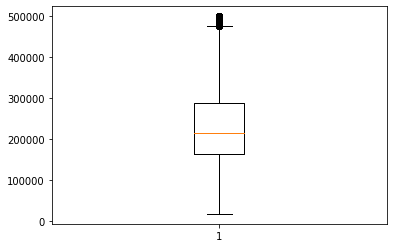

In [51]:
plt.boxplot(x = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_house_value'])

# Outlier (<1H OCEAN)

## 769 / 6551

### How to replace them? => log transformation

The idea is that taking the log of the data can restore symmetry to the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


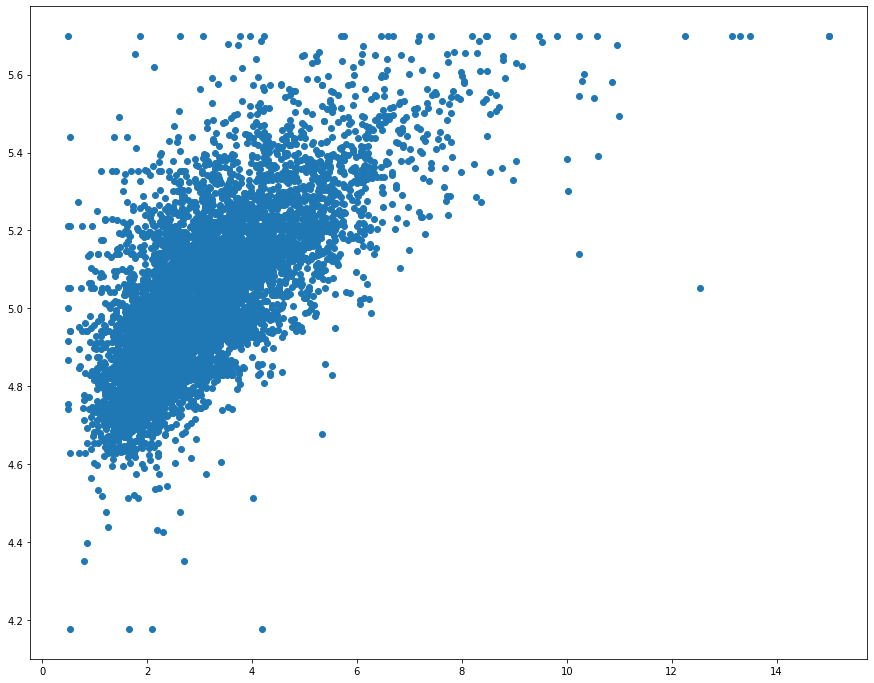

In [27]:
inland_housing = housing[(housing['ocean_proximity'] == "INLAND")]

inland_housing['median_house_value'] = np.log10(inland_housing['median_house_value'])

plt.figure(figsize= (15,12))
plt.scatter(x = inland_housing['median_income'], y = inland_housing['median_house_value'])

(array([   4.,    8.,   43.,  646., 1385., 1870., 1566.,  665.,  246.,
         118.]),
 array([4.17606231, 4.32835316, 4.48064402, 4.63293488, 4.78522573,
        4.93751659, 5.08980745, 5.2420983 , 5.39438916, 5.54668002,
        5.69897087]),
 <a list of 10 Patch objects>)

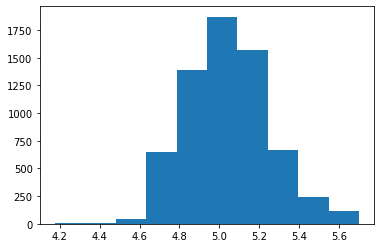

In [44]:
plt.hist(x = inland_housing['median_house_value'])

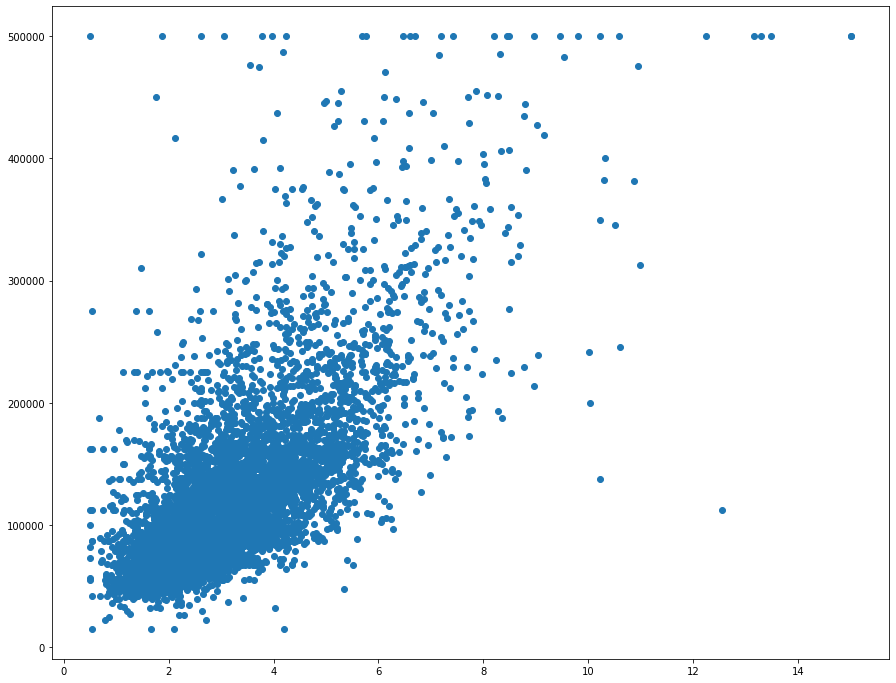

In [47]:
plt.figure(figsize=(15,12))
plt.scatter(x = housing[housing['ocean_proximity'] == 'INLAND']['median_income'], y = housing[housing['ocean_proximity'] == 'INLAND']['median_house_value'])

(array([ 831., 2602., 1783.,  681.,  326.,  135.,   80.,   45.,   30.,
          38.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

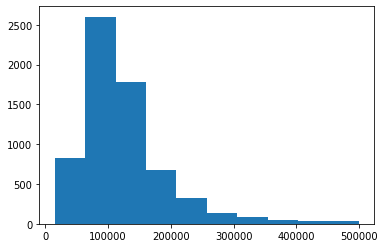

In [45]:
plt.hist(housing[housing['ocean_proximity'] == 'INLAND']['median_house_value'])

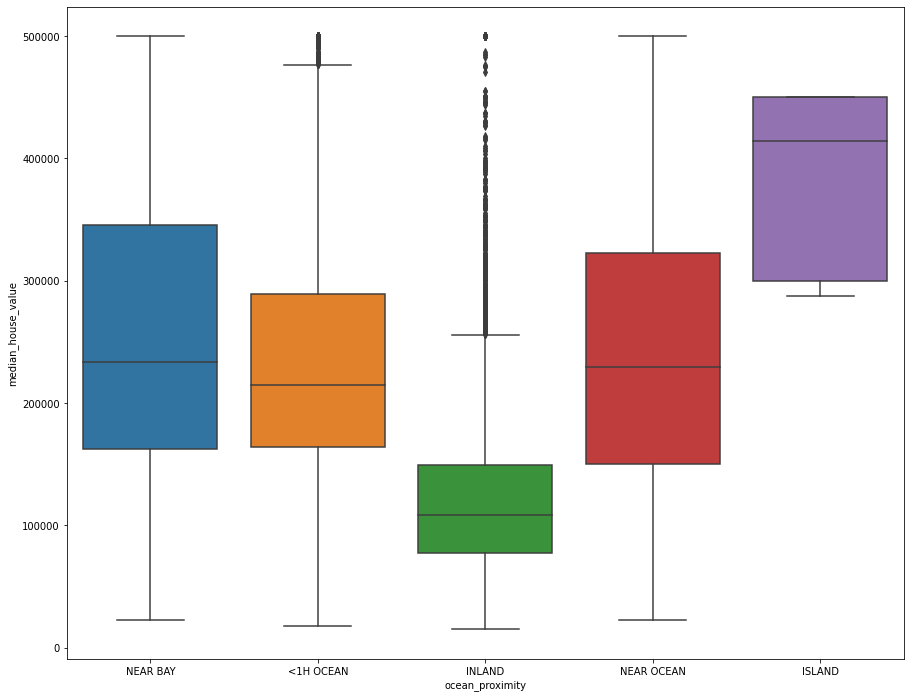

In [28]:
plt.figure(figsize= (15,12))
sns.boxplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

# outlier 탐지 : INLAND의 경우 집 가격이 평균적으로 낮지만 IQR * 1.5 이상의 값이 지나치게 많이 몰려있음

{'boxes': [<matplotlib.lines.Line2D at 0x7fe4be4d6a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe4be45dad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4be465b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4be4655d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe4be45d050>,
  <matplotlib.lines.Line2D at 0x7fe4be45d590>]}

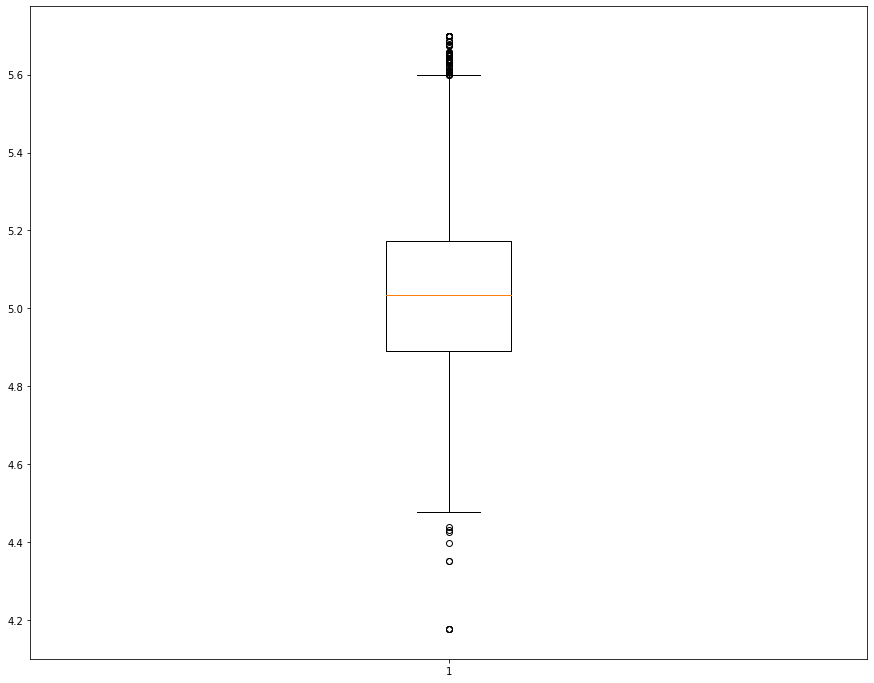

In [29]:
plt.figure(figsize = (15,12))
plt.boxplot(x = inland_housing['median_house_value'])

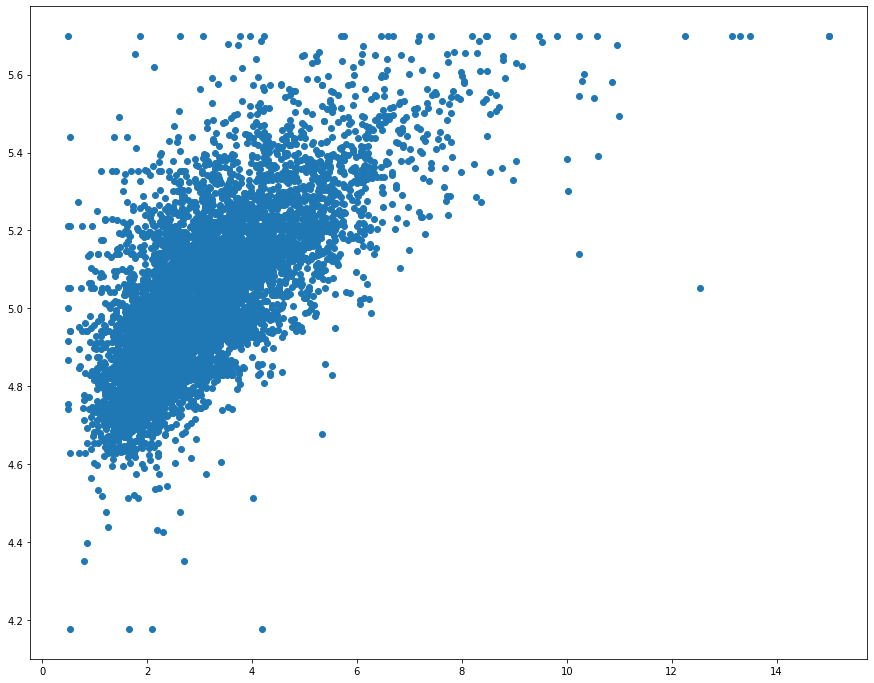

In [30]:
# inland_housing.head()
plt.figure(figsize = (15,12))
plt.scatter(x = inland_housing['median_income'], y = inland_housing['median_house_value'])

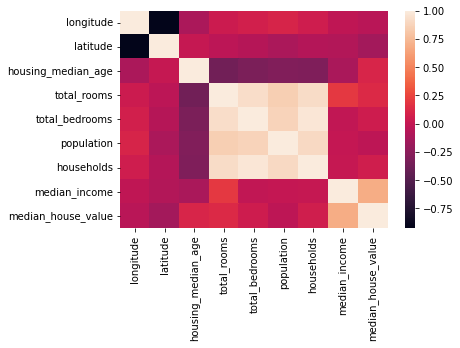

In [31]:
# visualize on heatmap

sns.heatmap(housing.corr())

In [32]:
# Download the image
# Where to save the figures
import os
import urllib.request
import tarfile

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7fe4bbb079d0>)

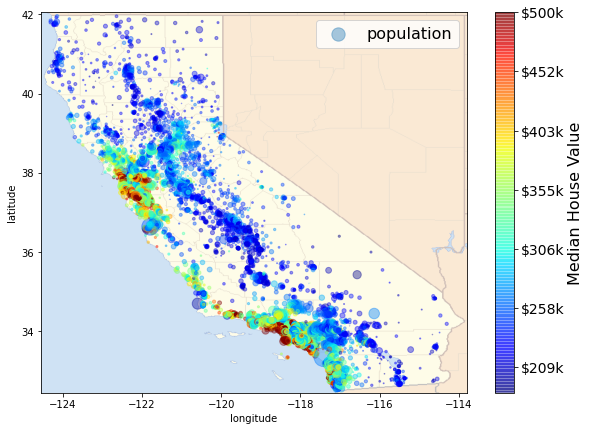

In [33]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))


ax = housing.plot(kind = 'scatter', x = "longitude", y = "latitude", alpha = 0.4,
            s=housing["population"] / 100, label = "population",
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = False, figsize = (10,7))

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
           cmap = plt.get_cmap('jet'))
cbar = plt.colorbar(ticks = tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize = 14)
cbar.set_label('Median House Value', fontsize = 16)
plt.legend(fontsize=16)
plt.show()


# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(ticks=tick_values/prices.max())
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)


# Visualize using geopandas

In [34]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 29.4 MB/s 
     |████████████████████████████████| 6.3 MB 60.3 MB/s 
     |████████████████████████████████| 16.7 MB 321 kB/s 


In [35]:
import geopandas as gpd

In [36]:
import folium
from folium.plugins import MarkerCluster
from folium import Marker

In [37]:
housing_gpd = gpd.GeoDataFrame(housing, geometry = gpd.points_from_xy(housing["longitude"], housing["latitude"]))
housing_gpd.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
housing_gpd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [39]:
us_map = gpd.read_file('/content/drive/MyDrive/ShapeFile/California_County_Boundaries/cnty19_1.shp')
print(us_map.crs)

epsg:3857


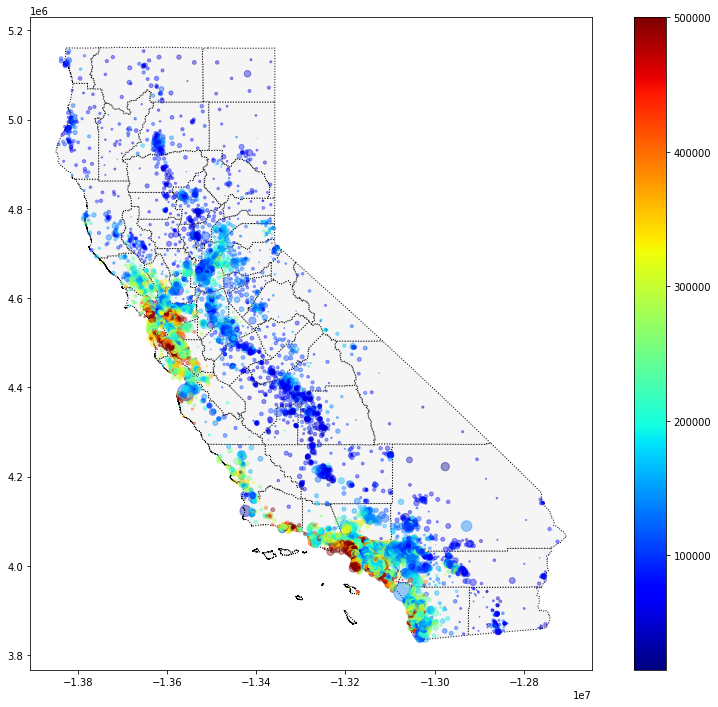

In [40]:
ax = us_map.plot(figsize = (15,12), color = 'whitesmoke', linestyle = ':', edgecolor = 'black')
housing_gpd_to_crs = housing_gpd.to_crs(epsg=3857)
housing_gpd_to_crs.plot(column = 'median_house_value', label="Population", ax = ax, markersize = housing['population']/100, legend = True, alpha=0.4,
                                   cmap = 'jet')

# Visualize using plotly (Scatter plot with mapbox)

In [41]:
import plotly.express as px

In [42]:
# 1. read mapbox token
# pk.eyJ1IjoidGVtcGxlMTciLCJhIjoiY2wxajlnNGwzMjJ1aTNjcDZyanhkMnd4eSJ9.Tnc8CGqtXStRSNQQ6l8XVQ
api_token = input("Enter API Toke for Mapbox")
# 2. import data

Enter API Toke for Mapboxpk.eyJ1IjoidGVtcGxlMTciLCJhIjoiY2wxajlnNGwzMjJ1aTNjcDZyanhkMnd4eSJ9.Tnc8CGqtXStRSNQQ6l8XVQ


In [43]:
fig = px.scatter_mapbox(housing_gpd, lat = 'latitude', lon = 'longitude', color = 'median_house_value', color_continuous_scale=px.colors.sequential.Sunset, size_max=30, zoom=4,
                  height = 600, width = 1000, size = housing_gpd['population']/100) 

fig.update_layout(font_size=10,  title={'xanchor': 'center','yanchor': 'top', 'y':0.9, 'x':0.5,}, 
        title_font_size = 24, mapbox_accesstoken=api_token, mapbox_style = "mapbox://styles/strym/ckhd00st61aum19noz9h8y8kw")

In [78]:
fig = px.scatter_mapbox(housing_gpd, lat = 'latitude', lon = 'longitude', color = 'ocean_proximity', color_continuous_scale=px.colors.sequential.Sunset, size_max=10, zoom=4,
                  height = 600, width = 1000, size = housing_gpd['median_house_value']/1000000) 

fig.update_layout(font_size=10,  title={'xanchor': 'center','yanchor': 'top', 'y':0.9, 'x':0.5,}, 
        title_font_size = 24, mapbox_accesstoken=api_token, mapbox_style = "mapbox://styles/strym/ckhd00st61aum19noz9h8y8kw")

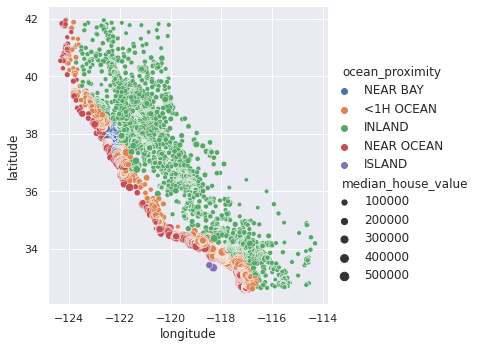

In [95]:

sns.set_theme(style = 'whitegrid')

cmap = sns.cubehelix_palette(rot=-.4)
sns.set(rc = {'figure.figsize':(15,12)})
g = sns.relplot(
    data = housing,
    x = 'longitude',
    y = 'latitude',
    hue = 'ocean_proximity',
    size = 'median_house_value',
    cmap = cmap)

In [101]:
print(housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values())

print("*" * 10)

print(housing.groupby('ocean_proximity')['median_house_value'].median().sort_values())

ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64
**********
ocean_proximity
INLAND        108500.0
<1H OCEAN     214850.0
NEAR OCEAN    229450.0
NEAR BAY      233800.0
ISLAND        414700.0
Name: median_house_value, dtype: float64
